In [2]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [3]:
df_sex = pd.read_csv('thesis__data_res.csv', usecols=['SEX', 'MORTDODY', 'AGE', 'YEAR', 'MORTSTAT'])

In [4]:
# add column that tells us at what age someone died
df_sex['AGE_AT_DEATH'] = df_sex['MORTDODY'] - df_sex['YEAR'] + df_sex['AGE']

# remove samples that are not tracked for mortality
df_sex = df_sex[(df_sex['MORTSTAT'] == 1) | (df_sex['MORTSTAT'] == 2)]

In [ ]:
# Analysis of age at death:

In [5]:
# use only samples that died
df_dead = df_sex[(df_sex['MORTSTAT'] == 1)]

# women vs men
df_women_deaths = df_dead[df_dead['SEX'] == 2]
df_men_deaths = df_dead[df_dead['SEX'] == 1]

# count number of death per AGE_AT_DEATH
deaths_women = df_women_deaths['AGE_AT_DEATH'].value_counts().sort_index()
deaths_men = df_men_deaths['AGE_AT_DEATH'].value_counts().sort_index()

# calculate mean and median for women
mean_age_death_women = df_women_deaths['AGE_AT_DEATH'].mean()
median_age_death_women = df_women_deaths['AGE_AT_DEATH'].median()

# calculate mean and median for men
mean_age_death_men = df_men_deaths['AGE_AT_DEATH'].mean()
median_age_death_men = df_men_deaths['AGE_AT_DEATH'].median()

In [ ]:
# Analysis of number of samples per year THAT ARE TRACKED FOR MORTALITY:

In [7]:
# female vs male
df_women_samples = df_sex[df_sex['SEX'] == 2]
df_men_samples = df_sex[df_sex['SEX'] == 1]

# deaths 
women_num = df_women_samples['YEAR'].value_counts().sort_index()
men_num = df_men_samples['YEAR'].value_counts().sort_index()

# total number of women and men samples
total_women = df_women_samples.shape[0]
total_men = df_men_samples.shape[0]

In [ ]:
# plot thre results of both analysis together

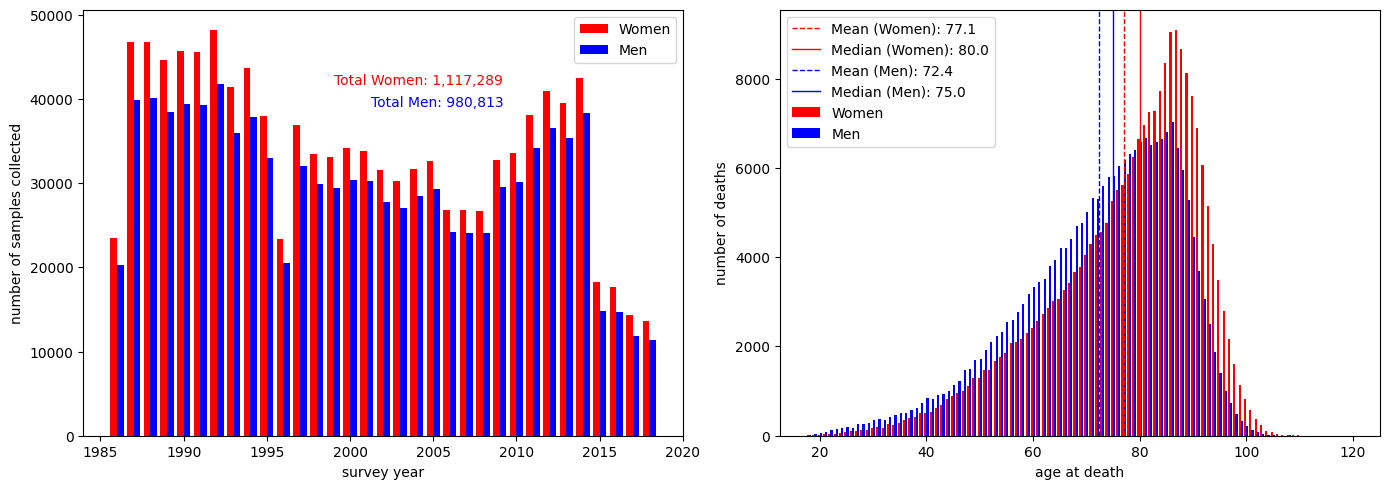

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# plot number of samples per year 
axes[0].bar(women_num.index - 0.2, women_num.values, width=0.4, color='red', label='Women')
axes[0].bar(men_num.index + 0.2, men_num.values, width=0.4, color='blue', label='Men')

# annotate total counts
axes[0].annotate(f'Total Women: {total_women:,.0f}', xy=(0.7, 0.85), xycoords='axes fraction', ha='right', va='top', fontsize=10, color='red')
axes[0].annotate(f'Total Men: {total_men:,.0f}', xy=(0.7, 0.8), xycoords='axes fraction', ha='right', va='top', fontsize=10, color='blue')

axes[0].set_xlabel('survey year')
axes[0].set_ylabel('number of samples collected')
axes[0].legend()

# plot deaths per age at death (moved to the right)
axes[1].bar(deaths_women.index - 0.2, deaths_women.values, width=0.4, color='red', label='Women')
axes[1].bar(deaths_men.index + 0.2, deaths_men.values, width=0.4, color='blue', label='Men')

# add mean and median lines
axes[1].axvline(mean_age_death_women, color='red', linestyle='--', linewidth=1, label=f'Mean (Women): {mean_age_death_women:.1f}')
axes[1].axvline(median_age_death_women, color='red', linewidth=1, label=f'Median (Women): {median_age_death_women:.1f}')
axes[1].axvline(mean_age_death_men, color='blue', linestyle='--', linewidth=1, label=f'Mean (Men): {mean_age_death_men:.1f}')
axes[1].axvline(median_age_death_men, color='blue', linewidth=1, label=f'Median (Men): {median_age_death_men:.1f}')

axes[1].set_xlabel('age at death')
axes[1].set_ylabel('number of deaths')
axes[1].legend()

plt.tight_layout()
plt.savefig('combined_plot_age_sex.jpg', format='jpg')
plt.show()